In [58]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Trying out multiple trajectories with Russ's example code and Pendulum env

(2, 1) (2, 1, 15) (2, 2, 15)
there are 2 cbs
 1

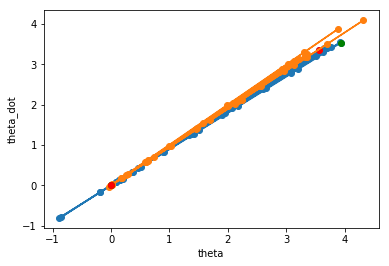

[0. 0.] <= [-59.13079577 -35.28720711] <= [0. 0.]
[0. 0.] <= [53.06681533 66.45275055] <= [0. 0.]
[0. 0.] <= [-58.33920431 -34.5085591 ] <= [0. 0.]
[0. 0.] <= [52.31472649 66.42401416] <= [0. 0.]
[0. 0.] <= [-57.54711547 -33.73371447] <= [0. 0.]
[0. 0.] <= [51.56216963 66.39140268] <= [0. 0.]
[0. 0.] <= [-56.75455861 -32.9633735 ] <= [0. 0.]
[0. 0.] <= [50.80917545 66.35421779] <= [0. 0.]
[0. 0.] <= [-55.96156443 -32.19825158] <= [0. 0.]
[0. 0.] <= [50.05577586 66.31174605] <= [0. 0.]
[0. 0.] <= [-55.16816484 -31.43907756] <= [0. 0.]
[0. 0.] <= [49.30200397 66.2632607 ] <= [0. 0.]
[0. 0.] <= [-54.37439295 -30.68659194] <= [0. 0.]
[0. 0.] <= [48.54789391 66.2080236 ] <= [0. 0.]
[0. 0.] <= [47.79348079 66.14528711] <= [0. 0.]
[0. 0.] <= [-52.78586977 -29.20469486] <= [0. 0.]
[0. 0.] <= [47.03880059 66.07429611] <= [0. 0.]
[0. 0.] <= [-51.99118957 -28.47680574] <= [0. 0.]
[0. 0.] <= [46.28389003 65.99429004] <= [0. 0.]
[0. 0.] <= [-51.19627901 -27.75864573] <= [0. 0.]
[0. 0.] <= [45.52878

[0. 0.] <= [21.23594184 44.10251807] <= [0. 0.]
[0. 0.] <= [-25.91621815  -3.06195568] <= [0. 0.]
[0. 0.] <= [21.19946271 44.14214548] <= [0. 0.]
[0. 0.] <= [-25.92724963  -3.03878598] <= [0. 0.]
[0. 0.] <= [21.20837363 44.11389574] <= [0. 0.]
[0. 0.] <= [-25.94028496  -3.1077251 ] <= [0. 0.]
[0. 0.] <= [21.22737301 44.01317139] <= [0. 0.]
[0. 0.] <= [-25.8877219   -3.15746495] <= [0. 0.]
[3.94159265 0.        ] <= [3.94159265 3.54159265] <= [3.94159265 0.        ]
[3.14159265 0.        ] <= [3.16406717 3.1525428 ] <= [3.14159265 0.        ]
[3.54159265 0.        ] <= [-0.08340598 -0.04041141] <= [3.54159265 0.        ]
[3.14159265 0.        ] <= [0. 0.] <= [3.14159265 0.        ]
total cost:  29.56 | 	constraint  1487.83 	bad 32,  1487.43
 13[0. 0.] <= [-32.35719834   6.63245524] <= [0. 0.]
[0. 0.] <= [26.49518452 64.17329068] <= [0. 0.]
[0. 0.] <= [-36.83285345   6.9919024 ] <= [0. 0.]
[0. 0.] <= [30.75616659 57.27119306] <= [0. 0.]
[0. 0.] <= [-38.28787627  -7.2288122 ] <= [0. 0.]
[

In [72]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
)
from nn_system.networks import *


###############################################
# Construct the inital MathematicalProgram
###############################################
num_trajectories = 2
num_samples      = 15
initial_conditions = (
    None,
#     "1",
#     "2",
#     "3",
)[0]
# seed = 1776
# seed = None
# seed = np.random.randint(0, 2000); print("seed: {}".format(seed))
seed = 1338
mto = MultipleTrajOpt("pendulum",
                      num_trajectories, 
                      num_samples,
                      ic_list=None,
                      warm_start=True,
                      seed=seed)


###############################################
# Add a neural network!
###############################################
kNetConstructor = None
# kNetConstructor = lambda: FC(2)
# kNetConstructor = lambda: FCBIG(2)
# kNetConstructor = lambda: MLPSMALL(2)
# kNetConstructor = lambda: MLP(2)
reg_type = "No"
# reg_type = "L1"
# reg_type = "L2"
if kNetConstructor is not None:
    mto.add_nn_params(kNetConstructor,
                  initialize_params = True, 
                  reg_type          = reg_type,
                  enable_constraint = True)

# Introduce a scaling factor in (0, 1] that can be used to shrink the initial
# conditions regions used for policy rollouts, so we can check an area SMALLER
# than that which was used for dircol calculations!
scaling = 0.5
mto.add_multiple_trajectories_visualization_callback(vis_ic_list=None)
mto.add_cost_and_constraint_printing_callback()

result = mto.Solve()
print(result)

In [73]:
# cb = mto.cbs[1]
# soln_vars = mto.prog.GetSolution(mto.prog.decision_variables())
# cb(soln_vars)
print(mto.prog.decision_variables())

[Variable('h0(0)', Continuous) Variable('h1(0)', Continuous)
 Variable('u0(0,0)', Continuous) Variable('u0(0,1)', Continuous)
 Variable('u0(0,2)', Continuous) Variable('u0(0,3)', Continuous)
 Variable('u0(0,4)', Continuous) Variable('u0(0,5)', Continuous)
 Variable('u0(0,6)', Continuous) Variable('u0(0,7)', Continuous)
 Variable('u0(0,8)', Continuous) Variable('u0(0,9)', Continuous)
 Variable('u0(0,10)', Continuous) Variable('u0(0,11)', Continuous)
 Variable('u0(0,12)', Continuous) Variable('u0(0,13)', Continuous)
 Variable('u0(0,14)', Continuous) Variable('u1(0,0)', Continuous)
 Variable('u1(0,1)', Continuous) Variable('u1(0,2)', Continuous)
 Variable('u1(0,3)', Continuous) Variable('u1(0,4)', Continuous)
 Variable('u1(0,5)', Continuous) Variable('u1(0,6)', Continuous)
 Variable('u1(0,7)', Continuous) Variable('u1(0,8)', Continuous)
 Variable('u1(0,9)', Continuous) Variable('u1(0,10)', Continuous)
 Variable('u1(0,11)', Continuous) Variable('u1(0,12)', Continuous)
 Variable('u1(0,13)',

In [ ]:
ti = 1
mto.print_pi_divergence(ti)

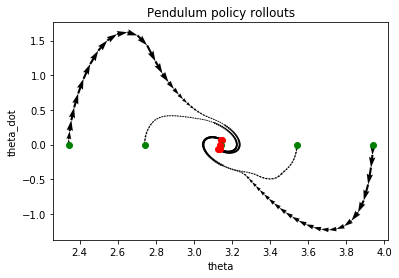

In [13]:
ti = 2
mto.plot_all_policies("state_quiver")

In [24]:
ti = 0
mto.render_policy(ti)

knots shape:  (2, 15)
(15,) (2, 15)
[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003] [[ 3.94159265e+00  3.88129218e+00  3.65945921e+00  3.44443453e+00
   3.30344849e+00  3.22365488e+00  3.18179406e+00  3.16081626e+00
   3.15061865e+00  3.14576471e+00  3.14348440e+00  3.14241457e+00
   3.14190300e+00  3.14166068e+00  3.14159265e+00]
 [ 0.00000000e+00 -7.55091030e-01 -1.21852562e+00 -8.95883683e-01
  -5.32868556e-01 -2.87238330e-01 -1.46406389e-01 -7.19931162e-02
  -3.45394558e-02 -1.62954750e-02 -7.62895479e-03 -3.60434139e-03
  -1.75159115e-03 -7.28360729e-04  0.00000000e+00]]


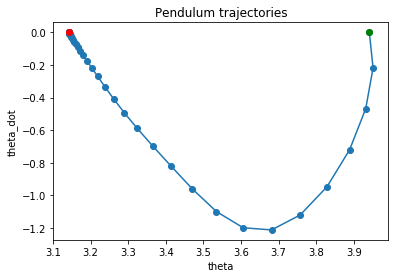

In [35]:
mto.plot_all_trajectories("state_scatter")
# mto.plot_all_trajectories("state_quiver")
# mto.plot_all_trajectories("tip_scatter")
# mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

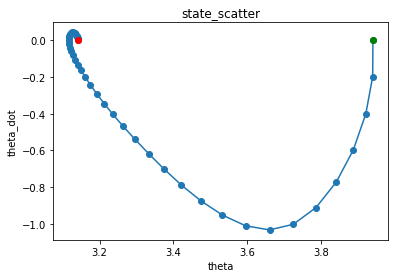

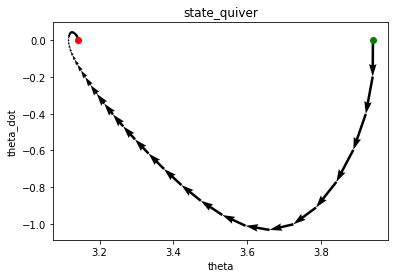

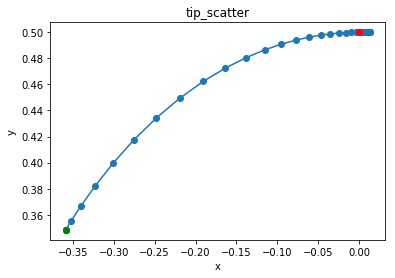

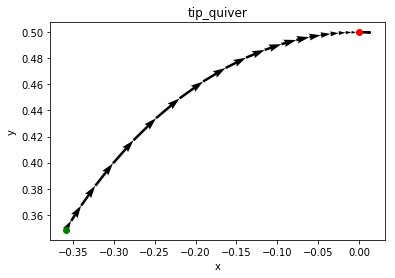

In [30]:
ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

mto.render_single_trajectory(ti)